# **Importing necessery libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax

# **Reading the dataset**

In [2]:
data = pd.read_csv('data_for_lr.csv')
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


# **Data processing**

In [3]:
data.isnull().sum()     # null values are present in the y column

x    0
y    1
dtype: int64

In [4]:
data.shape

(700, 2)

In [5]:
data = data.dropna()      # dropping the column that is containing the null value
data.isnull().sum()

x    0
y    0
dtype: int64

In [6]:
data.shape

(699, 2)

# **Training input and output, by creating two numpy arrays and storing the x and y columns in 2 different numpy arrays**

In [19]:
train_input = data.iloc[0:500, 0:1]
train_input = train_input.values

In [16]:
train_output = data.iloc[0:500, 1:2]
train_output = train_output.values

# **Test input and output**

In [17]:
test_input = data.iloc[500:700, 0:1]
test_input = test_input.values

In [18]:
test_output = data.iloc[500:700, 1:2]
test_output = test_output.values

In [11]:
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


# **Linear Regression**

# **1. Forward Propagation**

# f(x) = m*x + c

In [20]:
def forward_propagation(train_input, parameters):

    # Extract the slope (m) from the parameters dictionary
    m = parameters['m']

    # Extract the intercept (c) from the parameters dictionary
    c = parameters['c']

    # Compute the predictions by performing element-wise multiplication of m with train_input,
    # and then adding the intercept c to each element
    predictions = np.multiply(m, train_input) + c

    # Return the computed predictions
    return predictions

# **2. Cost function**

# summation(1/2n * (y - f(x))^2)

In [21]:
def cost_function(predictions, train_output):

  # Calculate the difference between actual output and predicted output
  # Square the errors to get an array of squared errors
  # Calculate the mean of the squared errors (Mean Squared Error)
  # Multiply by 0.5 for convenience in gradient calculations

  cost = np.mean((predictions - train_output) ** 2) * 0.5

  # Return the calculated cost

  return cost

# **3. Gradient descend for backward propagation**

# i. df = f(x) - y
# ii. dm = df * x
# iii. dc = df * 1

# formulas that were derived earlier

In [22]:
def backward_propagation(train_input, train_output, predictions):

    # Initialize an empty dictionary to store the gradients
    derivatives = dict()

    # Calculate the error between predictions and actual values
    df = predictions - train_output

    # Calculate the gradient with respect to m (slope)
    # This is the mean of the element-wise multiplication of the error and input values
    dm = np.mean(np.multiply(df, train_input))

    # Calculate the gradient with respect to c (intercept)
    # This is the mean of the error values
    dc = np.mean(df)

    # Store the calculated gradients in the dictionary
    derivatives['m'] = dm
    derivatives['c'] = dc

    # Return the dictionary containing the gradients
    return derivatives

# **4. Update Parameters**

# m = m - (learning_rate * dm)
# c = c - (learning_rate * dc)

In [23]:
def update_parameters(parameters, derivatives, learning_rate):
    # Update the parameter 'm' using gradient descent update rule
    parameters['m'] = parameters['m'] - learning_rate * derivatives['m']

    # Update the parameter 'c' using gradient descent update rule
    parameters['c'] = parameters['c'] - learning_rate * derivatives['c']

    # Return the updated parameters
    return parameters

# **Model Training**

In [24]:
def train(train_input, train_output, learning_rate, iters):
    # Initialize parameters randomly
    parameters = dict()
    parameters['m'] = np.random.uniform(0, 1)
    parameters['c'] = np.random.uniform(0, 1)

    # Prepare to track loss over iterations
    loss = list()

    # Training loop
    for i in range(iters):
        # Forward propagation to get predictions
        predictions = forward_propagation(train_input, parameters)

        # Compute the cost (mean squared error)
        cost = cost_function(train_output, predictions)
        loss.append(cost)
        print('\n')
        print(f"Iteration: {i+1}, Loss: {cost}")

        # Plot the original data and current predictions
        fig, ax = plt.subplots()
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '+', label='Training')
        ax.legend()
        plt.show()

        # Backward propagation to get gradients
        derivatives = backward_propagation(train_input, train_output, predictions)

        # Update parameters using the gradients
        parameters = update_parameters(parameters, derivatives, learning_rate)

    # Return the final parameters and the loss history
    return parameters, loss



Iteration: 1, Loss: 936.7582166030975


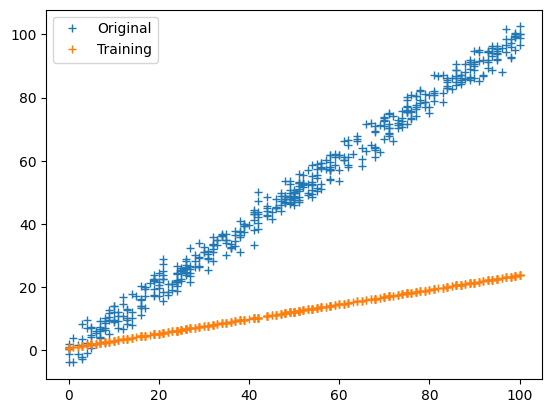



Iteration: 2, Loss: 427.2058530239655


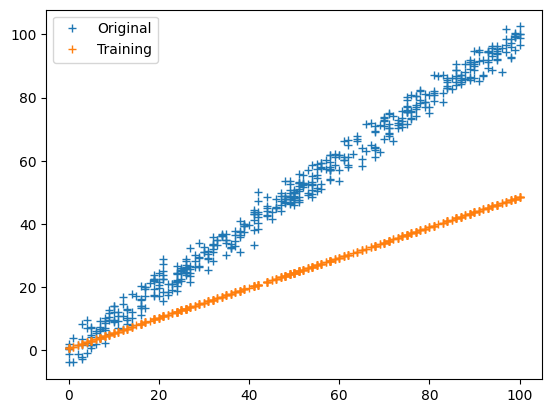



Iteration: 3, Loss: 196.02137817464512


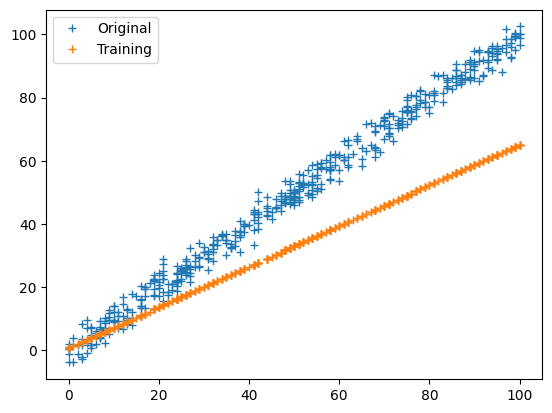



Iteration: 4, Loss: 91.13272277394222


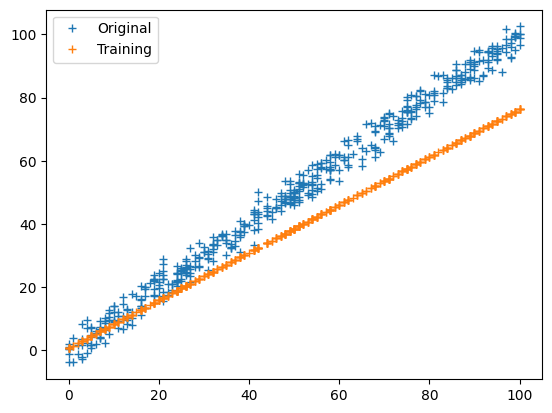



Iteration: 5, Loss: 43.54462054768777


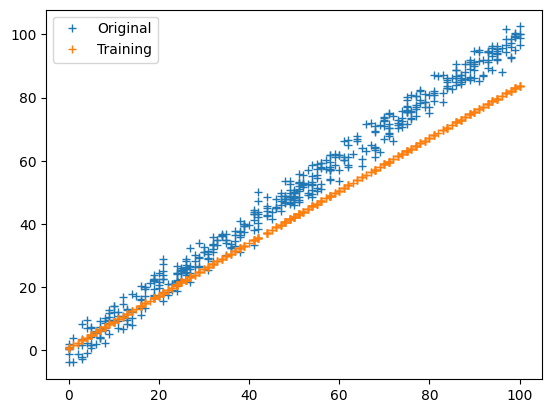



Iteration: 6, Loss: 21.95384276529051


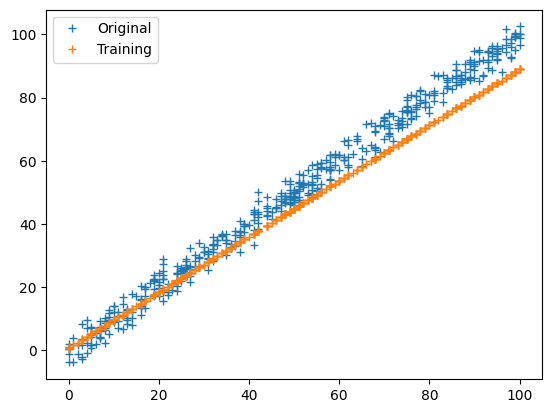



Iteration: 7, Loss: 12.158079878935018


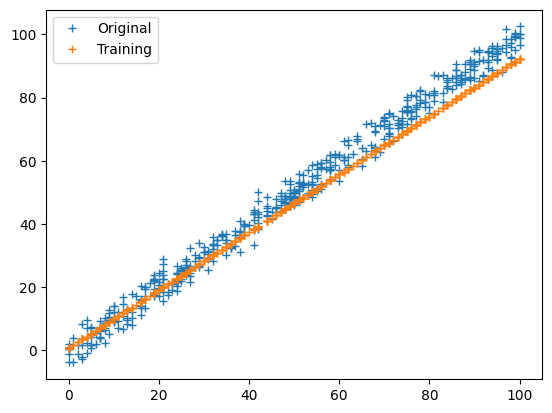



Iteration: 8, Loss: 7.713728315714096


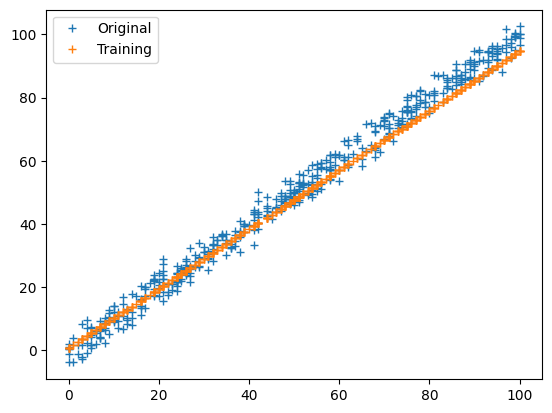



Iteration: 9, Loss: 5.697317997398761


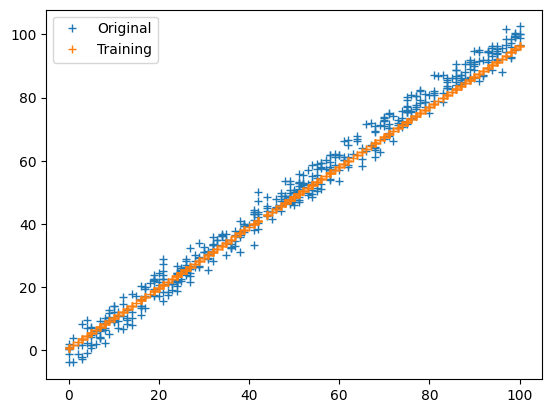



Iteration: 10, Loss: 4.782467311340589


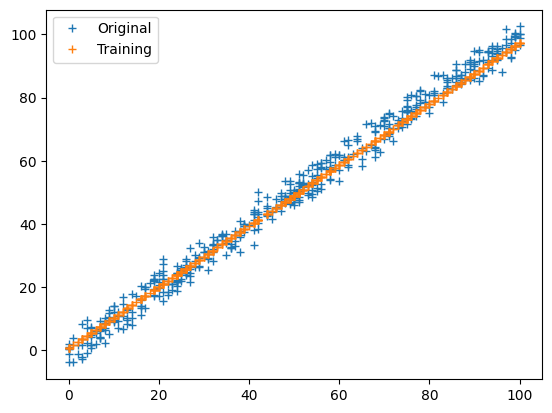



Iteration: 11, Loss: 4.367395450726071


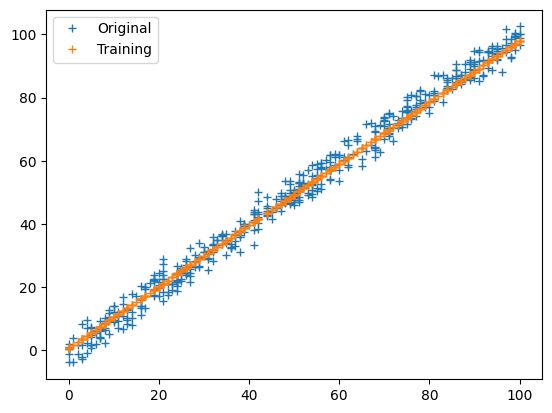



Iteration: 12, Loss: 4.179073796946655


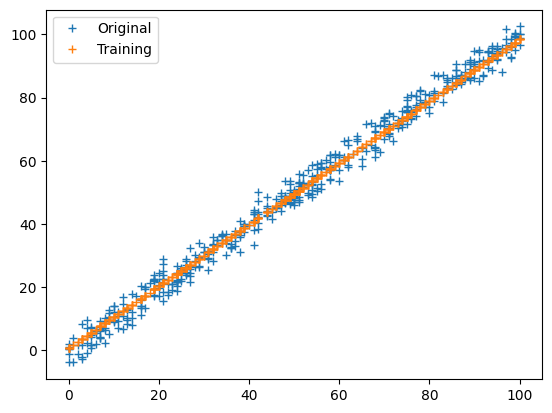



Iteration: 13, Loss: 4.093628963321909


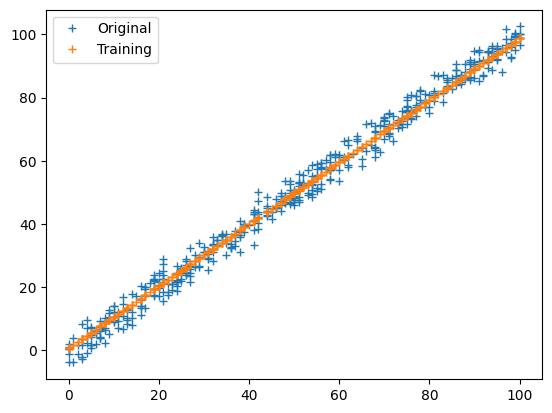



Iteration: 14, Loss: 4.0548594571076215


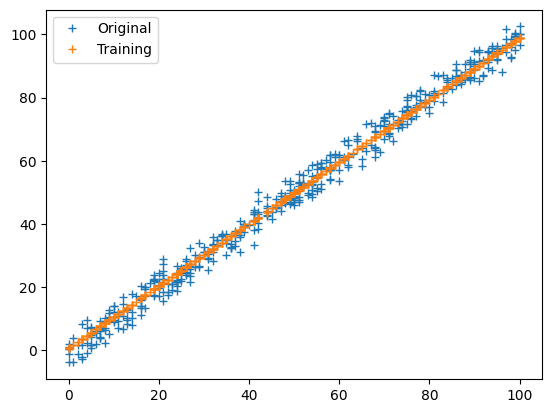



Iteration: 15, Loss: 4.0372665987946625


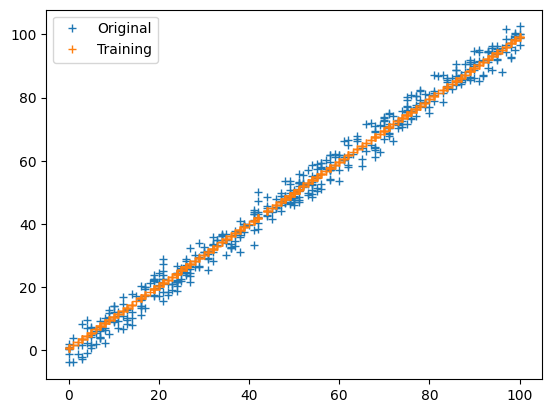



Iteration: 16, Loss: 4.029281609246335


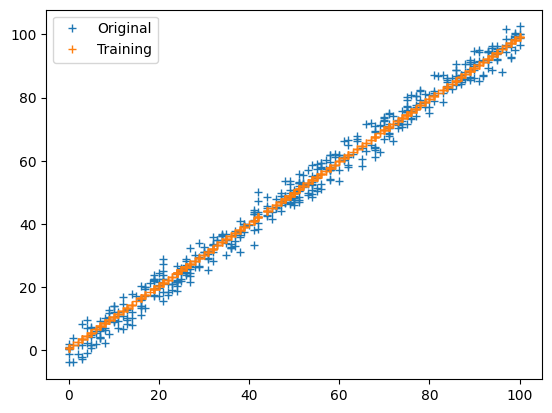



Iteration: 17, Loss: 4.025655720554263


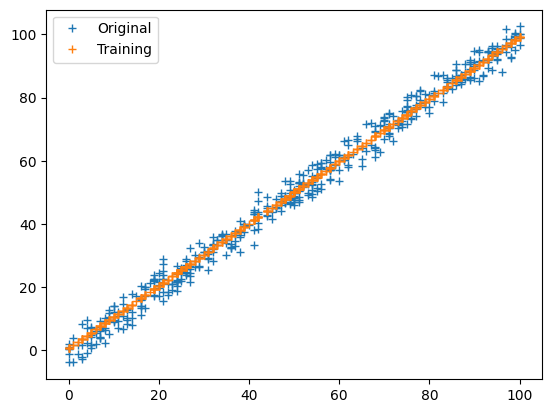



Iteration: 18, Loss: 4.024007560904647


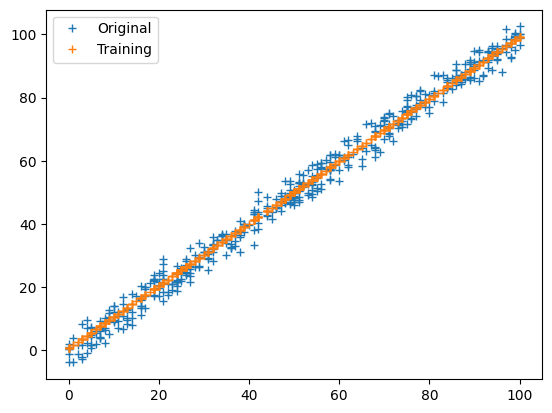



Iteration: 19, Loss: 4.0232566992678604


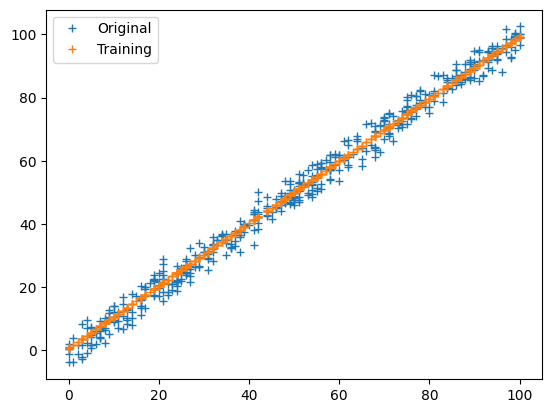



Iteration: 20, Loss: 4.02291294288902


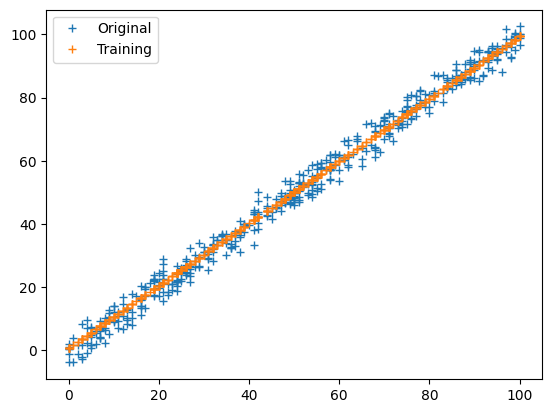

In [26]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [27]:
print(parameters)

{'m': 0.9864256077726984, 'c': 0.7080257352973655}


In [28]:
loss

[936.7582166030975,
 427.2058530239655,
 196.02137817464512,
 91.13272277394222,
 43.54462054768777,
 21.95384276529051,
 12.158079878935018,
 7.713728315714096,
 5.697317997398761,
 4.782467311340589,
 4.367395450726071,
 4.179073796946655,
 4.093628963321909,
 4.0548594571076215,
 4.0372665987946625,
 4.029281609246335,
 4.025655720554263,
 4.024007560904647,
 4.0232566992678604,
 4.02291294288902]

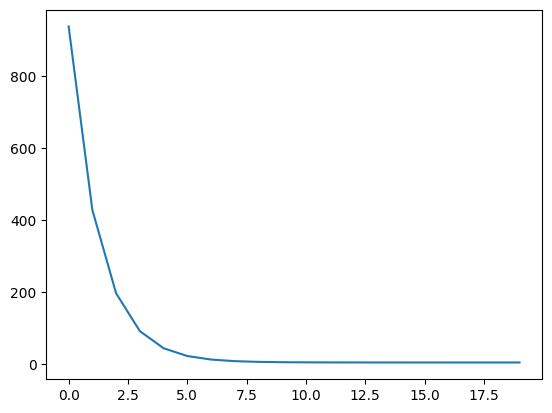

In [29]:
plt.plot(loss)

# **Let's Predict!**

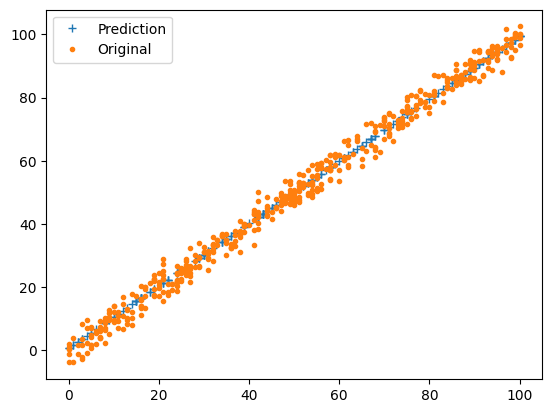

In [32]:
test_predictions = test_input * parameters['m'] + parameters['c']
plt.plot(test_input, test_predictions, '+', label='Prediction')
plt.plot(train_input, train_output, '.', label='Original')
plt.legend()
plt.show()

# how much accurate is the model?

In [33]:
cost_function(test_output, test_predictions)

# means the predicted values are +- 4.027 of the original values

4.027155450593378